# Overview

This notebook is using the free Iris data set and create two different methods to get an interactive plot of the 
data set in a 3D space

- 1st method is using matplotlib

- 2nd method is using plotly

A third method using TabPy ( which is from the software Tableau ) will be coming soon 

In [1]:
# We import panda to manipulate the data
import pandas as pd

# Link to the data set
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

# Print the top lines of the data frame containing the data set infos
df.head()

# import the StandardScaler to normalize the data
# It's aiming to put all of the data to the same scale to make the analysis more easy and accurate
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# getting out the features
x = df.loc[:, features].values
# getting out the target
y = df.loc[:,['target']].values
# normalization of the features
x = StandardScaler().fit_transform(x)

# We import PCA to squash all of the features (big vector) into the number that we want (vector with a size we choose)
from sklearn.decomposition import PCA

# Here we decide to take 3 PCA because we want to plot a 3D figure 
# If we want a flat figure then we would need to take 2 n_components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
# We create a final data frame with the principal components into their columns
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

# We add the target (or labels) to the final data frame and create a extra columns 
# that will contain the color information
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf['colorL'] = ""
finalDf['colorRGB'] = ""

# We set the color type based on the target
index = 0
while index < len(finalDf):
    if finalDf.target[index] == "Iris-setosa":
        finalDf.colorRGB[index] = "rgb(255, 0, 0)"
        finalDf.colorL[index] = "r"
    if finalDf.target[index] == "Iris-virginica":
        finalDf.colorRGB[index] = "rgb(0, 255, 0)"
        finalDf.colorL[index] = "g"
    if finalDf.target[index] == "Iris-versicolor":
        finalDf.colorRGB[index] = "rgb(0, 0, 255)"
        finalDf.colorL[index] = "b"
    index= index + 1
    
# We now have everything to plot the figure
# 1 - plotting with plotly
# 2 - Plotting with matplotlib

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framewo

<IPython.core.display.Javascript object>


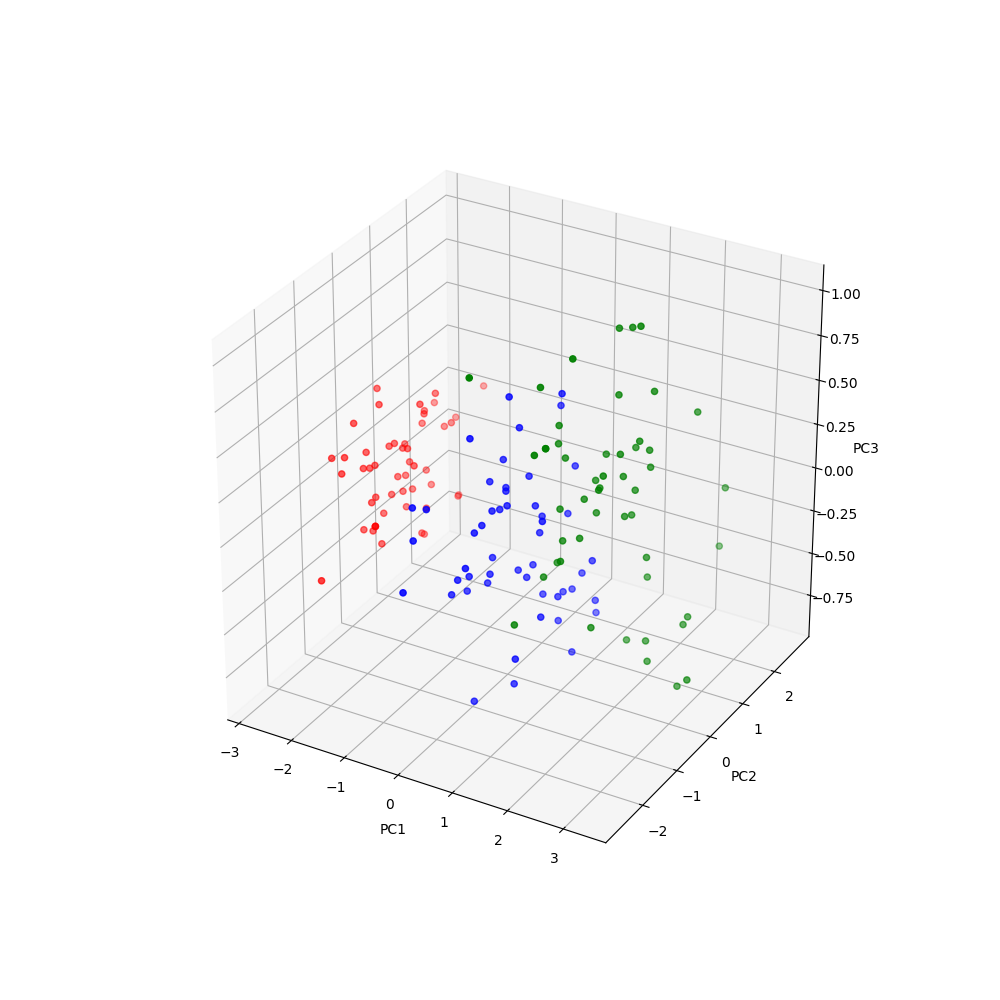

In [2]:
# What we need for matplotlib 3D plot to work
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
# if you put notebook instead of the weel known inline it allow the plot to be interactive
%matplotlib notebook

# Creation of the figure that we will plot
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111, projection='3d')

# we give the x, y and z axis of each of our row (iris flower) and also set the color
xs = finalDf['principal component 1'] 
ys = finalDf['principal component 2'] 
zs = finalDf['principal component 3'] 
color = finalDf['colorL']

# we scatter the informations and choose a marker type
ax.scatter(xs, ys, zs, c=color, marker='o')

# Just the labels of the axis
ax.set_xlabel('PC1') 
ax.set_ylabel('PC2') 
ax.set_zlabel('PC3')

# show the figure
plt.show()

In [4]:
# What we need to import for plotly to work
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# ****************************************** 
#              IMPORTANT COMMENT      
# ******************************************
# In order for plotly to work you need to create an account if you don't already have one :
#  - If you need to create one go to https://plot.ly/ and sign up
#  - when you have an account you just have to put your username and api_key in the line below
plotly.tools.set_credentials_file(username='your_username', api_key='your_api_key')


# This part is only used to have the starting and ending of each group in the finalDF dataframe
# So that we use those index to create the 3 different plotly groups to plot
# table i will contain the index of the last element of the first 2 groups
i = [] 
# u is juste a variable used to loop through the array and keep a trace of the index
u = 0 
while u < len(finalDf)-1:
    if (finalDf.target[u] == "Iris-setosa")&(finalDf.target[u+1] != "Iris-setosa"):
        i.append(u)
    if (finalDf.target[u] == "Iris-versicolor")&(finalDf.target[u+1] != "Iris-versicolor"):
        i.append(u)
    u = u + 1
         

# create an plotly element with all the (x, y z) informations for the Iris Setosa of the data set
Iris_setosa = go.Scatter3d(
            name = "Iris setosa",
            x= finalDf['principal component 1'][0:i[0]], 
            y= finalDf['principal component 2'][0:i[0]],
            z= finalDf['principal component 3'][0:i[0]],
            mode='markers',
            marker=dict(
                size=8,
                color=str(finalDf['colorRGB'][0:i[0]]),                
                opacity=0.8
            )
        )

# create an plotly element with all the (x, y z) informations for the Iris versicolor of the data set
Iris_versicolor = go.Scatter3d(
            name = "Iris versicolor",
            x= finalDf['principal component 1'][i[0]+1:i[1]],
            y= finalDf['principal component 2'][i[0]+1:i[1]],
            z= finalDf['principal component 3'][i[0]+1:i[1]],
            mode='markers',
            marker=dict(
                size=8,
                color=str(finalDf['colorRGB'][i[0]+1:i[1]]),                
                opacity=0.8
            )
        )

# create an plotly element with all the (x, y z) informations for the Iris virginica of the data set
Iris_virginica = go.Scatter3d(
            name = "Iris virginica",
            x= finalDf['principal component 1'][i[1]+1:],
            y= finalDf['principal component 2'][i[1]+1:],
            z= finalDf['principal component 3'][i[1]+1:],
            mode='markers',
            marker=dict(
                size=8,
                color=str(finalDf['colorRGB'][i[1]+1:]),                
                opacity=0.8
            )
        )

# Create data wich regroup all the information we need to send to plotly 
data = [Iris_setosa, Iris_versicolor, Iris_virginica]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

layout = go.Layout(
    title='Iris PCA 3D plot',
)

# those lines send the information to plotly for processing and plotting
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotly/tools.py:1416: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~AxelSmrtn/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'
